<a href="https://colab.research.google.com/github/alyani-fr/medical-data-visualizer/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np 

In [2]:
raw_df = pd.read_csv('medical_examination.csv')

In [3]:
raw_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


##**Data Cleaning & Preparation**

Before we can begin to further analyse the data, we have to clean and prepare our dataframe so that it will be easier to gather informations. The columns that needed some adjustments are 'age' and 'sex'.
- The 'age' column are recorded by days. So, we need to convert it into years. To do so, we use a simple formula of converting days into years by dividing the number of days by 365. 
- The 'sex' column does not specify the gender such that the patient is a male or a female. Specifying this will make our analysis easier in the future.

In [5]:
#raw_df['age']

Now that we've converted the values in comlumn 'age' from days to year, we can modify our dataframe (raw_df).

In [6]:
#raw_df['age'] = round(raw_df['age']/365)

We can convert the value type in column 'age' from float to int.

In [7]:
#raw_df['age'] = raw_df['age'].astype(int)
#raw_df

In [8]:
raw_df['sex'].unique()

array([2, 1, 3])

Now that our 'age' column make more sense, we can modify the 'sex' column next. It can be seen that for values in the 'sex' column is int where 1, 2 and 3 is a categorical code for genders. We can assume that the values represent 1 = male, 2 = female and 3 = unknown/blank. 

In [9]:
#raw_df['sex'].replace(to_replace = 1, value = 'male', inplace = True)
#raw_df['sex'].replace(to_replace = 2, value = 'female', inplace = True)
#raw_df['sex'].replace(to_replace = 3, value = 'unknown', inplace = True)

In [10]:
#raw_df

Add an overweight column to the data. 
- To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
- If that value is > 25 then the person is overweight. 
- Use the value 0 for NOT overweight and the value 1 for overweight.
- We can see that the value of height is in cm. To convert it to meter, we need to devide by 100. 

In [11]:
raw_df['bmi'] = round(raw_df['weight'] / ((raw_df['height'] / 100) ** 2))
raw_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,27.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.0


In [12]:
raw_df.loc[raw_df['bmi'] > 25, 'overweight'] = 1
raw_df.loc[raw_df['bmi'] <= 25, 'overweight'] = 0

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  bmi          70000 non-null  float64
 14  overweight   70000 non-null  float64
dtypes: float64(3), int64(12)
memory usage: 8.0 MB


In [14]:
raw_df['overweight'] = raw_df['overweight'].astype(int)
raw_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,27.0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.0,1


In [15]:
raw_df.drop('bmi', inplace=True, axis=1)
raw_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


Normalize the data by making 0 always good and 1 always bad. 
- If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). 

In [16]:
raw_df['cholesterol'].unique()

array([1, 3, 2])

In [17]:
raw_df['gluc'].unique()

array([1, 2, 3])

In [18]:
raw_df.replace(to_replace={'cholesterol': {1: 0, 2: 1, 3: 1}, 'gluc': {1: 0, 2: 1, 3: 1}},
           inplace=True)
raw_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


##**Wide vs Long Dataset**

Generally there are two tyoes of datasets: *wide* and *long*. Different types of satistical analyses will require different data formats and sometimes companies will provide you with data in stupid formats. Thus, it's crucial to know how to convert between wide and long datasets. 

###**Wide Data Formats**
Wide data formats are what you're probably traditionally used to seeing. Each variable is a column and each individual participant is a row. Can think of the wide-format the "excel" way. 
- Convert wide format from long format using Pandas pivot function. 
- wide_df = long_df.pivot(index='', columns='', values='').reset_index()

###**Long Data Formats**
You don't waste space if some data is missing. If this happens then a row will not exist and that is all. You also do not have to modify the table structure if for some reason a new feature is added, you just modify the data by adding rows with the new feature as needed. 
- Convert long format from wide format using Pandas melt function.
- df = pd.melt(wide_df, id_vars=[''], value_vars=['', '', ''])

**Task:**
Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the *cholesterol*, *gluc*, *alco*, *active*, and *smoke* variables for patients with *cardio=1* and *cardio=0* in different panels.

In [19]:
long_df = pd.melt(raw_df, id_vars = ['cardio'], value_vars = ['active','alco','cholesterol','gluc','overweight','smoke'])
long_df

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [20]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
long_df = long_df.groupby(['cardio','variable','value'])['value'].count().to_frame()
long_df

value
cardio variable    value       
0      active      0       6378
                   1      28643
       alco        0      33080
                   1       1941
       cholesterol 0      29330
                   1       5691
       gluc        0      30894
                   1       4127
       overweight  0      17545
                   1      17476
       smoke       0      31781
                   1       3240
1      active      0       7361
                   1      27618
       alco        0      33156
                   1       1823
       cholesterol 0      23055
                   1      11924
       gluc        0      28585
                   1       6394
       overweight  0      11974
                   1      23005
       smoke       0      32050
                   1       2929

In [21]:
long_df.rename(columns={'value':'total'}, inplace=True)

In [22]:
long_df.reset_index(inplace=True)

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

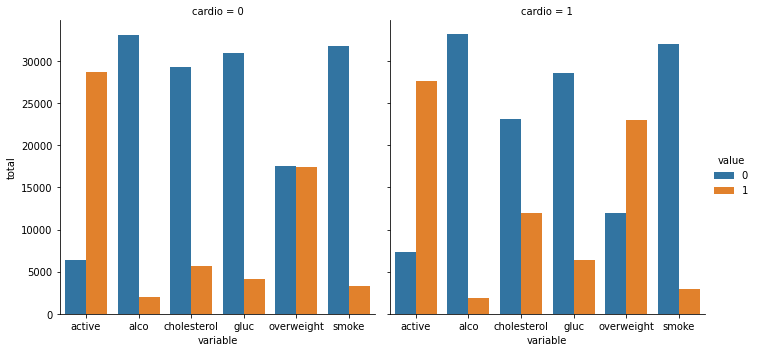

In [24]:
catplot = sns.catplot(data=long_df, x="variable", y="total", hue="value", col="cardio", kind="bar")

**Task:** Clean the data. Filter out the following patient segments that represent incorrect data:
- Diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- Height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- Height is more than the 97.5th percentile
- Weight is less than the 2.5th percentile
- Weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle

In [25]:
df_heat = raw_df[raw_df['ap_lo'] <= raw_df['ap_hi']]

In [26]:
df_heat = df_heat[df_heat['height'] >= raw_df['height'].quantile(0.025)]
df_heat = df_heat[df_heat['height'] <= raw_df['height'].quantile(0.975)]
df_heat = df_heat[df_heat['weight'] >= raw_df['weight'].quantile(0.025)]
df_heat = df_heat[df_heat['weight'] <= raw_df['weight'].quantile(0.975)]

**Correlation** is a statistical technique that shows how two variables are related. **Pandas dataframe.corr()** method is used for creating the correlation matrix. It is used *to find the pairwise correlation of all columns in the dataframe*. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [27]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [28]:
corr.round(1)
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.001762
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.093908
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.060552
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.158893
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.677277
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.016385
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.177592
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.134916
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.094471
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.008765


###**Triangle correlation heatmap**
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. 

A correlation heatmap, like a regular heatmap is assisted by a colorbar making data easily readable and comprehensible.
A correlation heatmap is a rectangular representation of data and it repeats the same data description twice because the categories are repeated on both axis for computing analysis. Hence, the same result is obtained twice. A correlation heatmap that presents data only once without repetition that is categories are correlated only once is known as a triangle correlation heatmap. Since data is symmetric across the diagonal from left-top to right bottom the idea of obtaining a triangle correlation heatmap is to remove data above it so that it is depicted only once. The elements on the diagonal are the parts where categories of the same type correlate.

For plotting heatmap method of the seaborn module will be used. Along with that mask, argument will be passed. Mask is a heatmap attribute that takes a dataframe or a boolean array as an argument and displays only those positions which are marked as False or where masking is provided to be False.

The following steps show how a triangle correlation heatmap can be produced:

- Import all required modules first
- Import the file where your data is stored
- Plot a heatmap
- Mask the part of the heatmap that shouldn’t be displayed
- Display it using matplotlib

For masking, here an array using NumPy is being generated as shown below: 
- np.triu(np.ones_like())

In [29]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

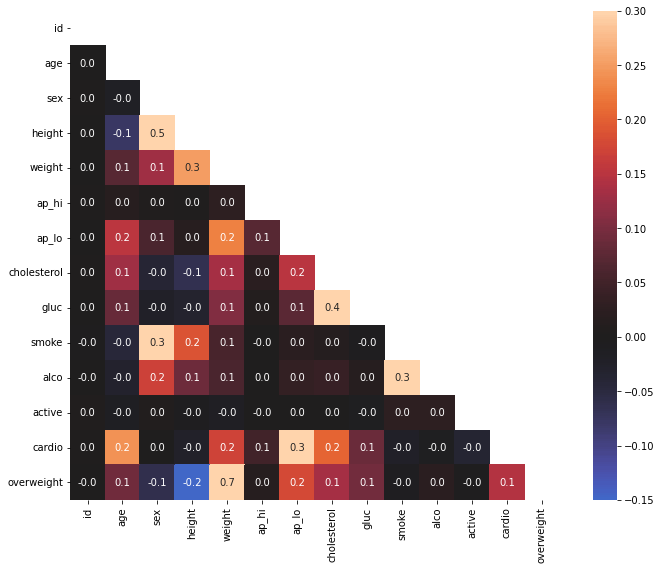

In [31]:
# Draw the heatmap with 'sns.heatmap()'
fig, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(corr, annot=True, fmt='.1f', square=True, mask=mask, center=0.00, vmin=-0.15, vmax=0.3) 